In [69]:
# Import dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
import seaborn as sns
import plotly.express as px
from pandas.plotting import scatter_matrix
import pgeocode




In [70]:
# Import the data from the CSV file
mls_df = pd.read_csv("Clean_Data/mls_th_cleaned.csv")
mls_df.head()

,MLS #,City,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon,Cluster,Price per SqFt
0,2509707,Cary,27511,4,4,6115,1,1985,2023-05-08,2023-06-12,1049900,1275000,35,225100,35.7641,-78.7786,2,208.503679
1,2444544,Chapel Hill,27517,4,5,4049,1,2004,2022-04-25,2022-06-07,1090000,1300000,43,210000,35.9182,-79.0035,1,321.066930
2,2320632,Durham,27707,3,5,2763,1,2020,2020-05-22,2021-08-05,575000,729840,440,154840,35.9631,-78.9315,1,264.147666
3,2428221,Cary,27511,3,4,3477,1,2004,2022-01-24,2022-02-09,949900,1100000,16,150100,35.7641,-78.7786,2,316.364682
4,10018970,Chapel Hill,27517,4,5,4049,1,2004,2024-04-06,2024-04-17,1350000,1500000,11,150000,35.9182,-79.0035,1,370.461842


In [71]:
# Copy the data frame to a new data frame
th_df = mls_df.copy()

th_df.head()

,MLS #,City,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon,Cluster,Price per SqFt
0,2509707,Cary,27511,4,4,6115,1,1985,2023-05-08,2023-06-12,1049900,1275000,35,225100,35.7641,-78.7786,2,208.503679
1,2444544,Chapel Hill,27517,4,5,4049,1,2004,2022-04-25,2022-06-07,1090000,1300000,43,210000,35.9182,-79.0035,1,321.066930
2,2320632,Durham,27707,3,5,2763,1,2020,2020-05-22,2021-08-05,575000,729840,440,154840,35.9631,-78.9315,1,264.147666
3,2428221,Cary,27511,3,4,3477,1,2004,2022-01-24,2022-02-09,949900,1100000,16,150100,35.7641,-78.7786,2,316.364682
4,10018970,Chapel Hill,27517,4,5,4049,1,2004,2024-04-06,2024-04-17,1350000,1500000,11,150000,35.9182,-79.0035,1,370.461842


In [72]:
th_df.describe()

,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon,Cluster,Price per SqFt
count,21319.000000,21319.000000,21319.000000,21319.000000,21319.000000,21319.000000,2.131900e+04,2.131900e+04,21319.000000,21319.000000,21319.000000,21319.000000,21319.000000,21319.000000
mean,27581.292040,2.923402,3.101975,1796.771143,1.018810,2010.366856,3.547355e+05,3.592279e+05,94.614757,4492.456823,35.836698,-78.765458,1.106572,305.086443
std,130.319017,0.612742,0.606370,466.290276,0.214129,13.552066,1.209425e+05,1.203425e+05,142.619572,17801.315666,0.147890,0.239841,1.075224,4824.927030
min,23917.000000,1.000000,1.000000,1.000000,1.000000,1936.000000,2.200000e+03,2.200000e+03,0.000000,-170000.000000,33.904700,-83.092900,0.000000,1.304864
25%,27519.000000,3.000000,3.000000,1460.000000,1.000000,2004.000000,2.771725e+05,2.819775e+05,37.000000,-1840.000000,35.764500,-78.887000,0.000000,173.364854
50%,27603.000000,3.000000,3.000000,1735.000000,1.000000,2016.000000,3.390000e+05,3.420350e+05,56.000000,0.000000,35.848000,-78.790800,1.000000,197.631384
75%,27616.000000,3.000000,3.000000,2077.000000,1.000000,2021.000000,4.100000e+05,4.150000e+05,125.500000,10000.000000,35.918200,-78.600800,2.000000,223.490275
max,28751.000000,6.000000,5.000000,6115.000000,8.000000,2024.000000,1.973000e+06,1.905000e+06,16094.000000,225100.000000,39.363100,-76.660400,4.000000,265000.000000


In [73]:
th_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21319 entries, 0 to 21318
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MLS #           21319 non-null  object 
 1   City            21319 non-null  object 
 2   Zip             21319 non-null  int64  
 3   Bedrooms        21319 non-null  int64  
 4   Total Baths     21319 non-null  int64  
 5   SqFt            21319 non-null  int64  
 6   Acres           21319 non-null  int64  
 7   Year Built      21319 non-null  int64  
 8   List Date       21319 non-null  object 
 9   Closing Date    21319 non-null  object 
 10  List Price      21319 non-null  int64  
 11  Sold Price      21319 non-null  int64  
 12  Days on Market  21319 non-null  int64  
 13  Over Asking     21319 non-null  int64  
 14  Lat             21319 non-null  float64
 15  Lon             21319 non-null  float64
 16  Cluster         21319 non-null  int64  
 17  Price per SqFt  21319 non-null 

In [74]:
#Create a copy of the data frame and drop the non-numeric columns
th_nostr_df = th_df.copy()
th_nostr_df = th_nostr_df.drop(columns=['City'])
th_nostr_df = th_nostr_df.drop(columns=['List Date'])
th_nostr_df = th_nostr_df.drop(columns=['Closing Date'])
th_nostr_df = th_nostr_df.drop(columns=['MLS #'])

# Save the DataFrame to a CSV file
th_nostr_df.to_csv('Clean_Data/mls_th_cleaned_nostring.csv', index=False)

#Create a correlation matrix
corr_matrix = th_nostr_df.corr()
corr_matrix["Sold Price"].sort_values(ascending=False)

Sold Price        1.000000
List Price        0.989126
SqFt              0.724474
Total Baths       0.453917
Bedrooms          0.400207
Year Built        0.319310
Days on Market    0.099557
Over Asking       0.040171
Lat               0.021653
Price per SqFt   -0.019118
Acres            -0.031279
Zip              -0.039360
Cluster          -0.079432
Lon              -0.092856
Name: Sold Price, dtype: float64

array([[<Axes: xlabel='Sold Price', ylabel='Sold Price'>,
        <Axes: xlabel='SqFt', ylabel='Sold Price'>,
        <Axes: xlabel='Total Baths', ylabel='Sold Price'>,
        <Axes: xlabel='Bedrooms', ylabel='Sold Price'>,
        <Axes: xlabel='Lat', ylabel='Sold Price'>,
        <Axes: xlabel='Lon', ylabel='Sold Price'>],
       [<Axes: xlabel='Sold Price', ylabel='SqFt'>,
        <Axes: xlabel='SqFt', ylabel='SqFt'>,
        <Axes: xlabel='Total Baths', ylabel='SqFt'>,
        <Axes: xlabel='Bedrooms', ylabel='SqFt'>,
        <Axes: xlabel='Lat', ylabel='SqFt'>,
        <Axes: xlabel='Lon', ylabel='SqFt'>],
       [<Axes: xlabel='Sold Price', ylabel='Total Baths'>,
        <Axes: xlabel='SqFt', ylabel='Total Baths'>,
        <Axes: xlabel='Total Baths', ylabel='Total Baths'>,
        <Axes: xlabel='Bedrooms', ylabel='Total Baths'>,
        <Axes: xlabel='Lat', ylabel='Total Baths'>,
        <Axes: xlabel='Lon', ylabel='Total Baths'>],
       [<Axes: xlabel='Sold Price', ylabel='Be

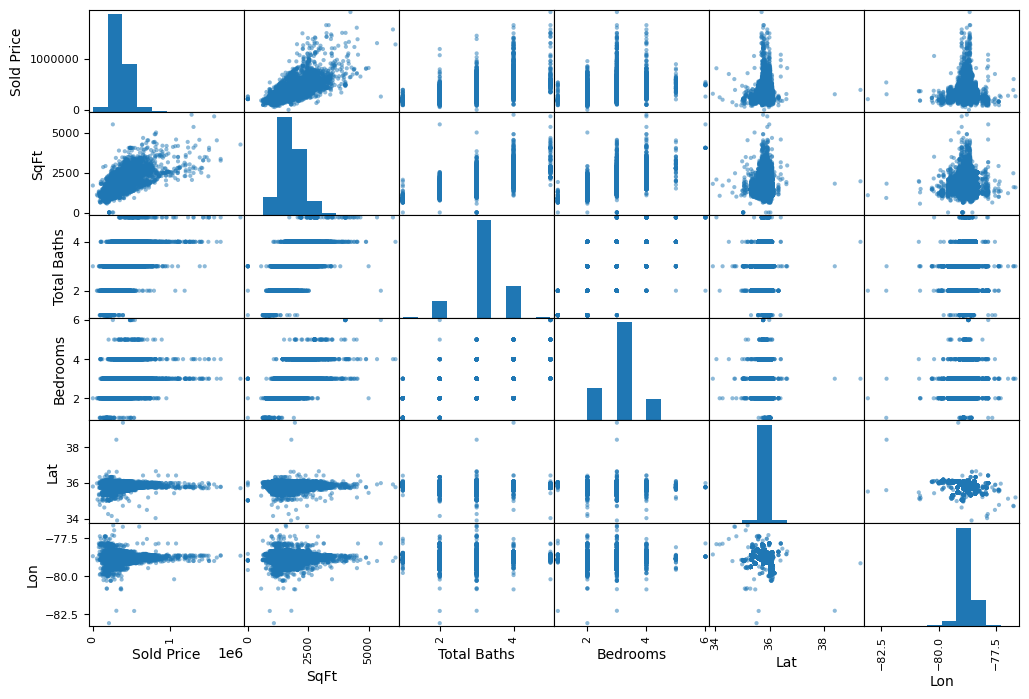

In [75]:
#Visualize the scatter matrix
scatter_columns = ["Sold Price", "SqFt", "Total Baths", "Bedrooms", 'Lat', 'Lon']
scatter_matrix(th_nostr_df[scatter_columns], figsize=(12, 8))
#plt.savefig('matrix.png')

<Axes: xlabel='SqFt', ylabel='Sold Price'>

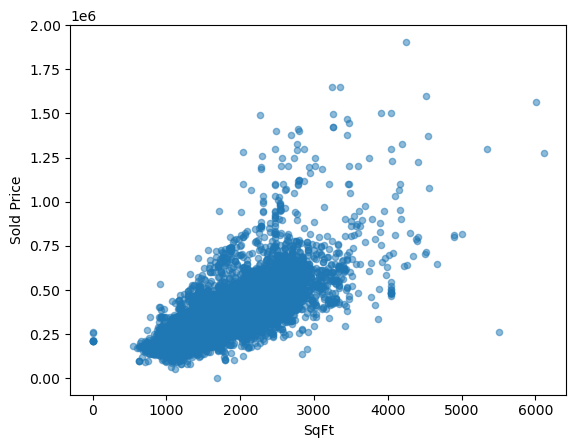

In [76]:
#Visualize the scatter plot for Total Living Area SqFt vs Sold Price
th_nostr_df.plot(kind="scatter", x="SqFt", y="Sold Price", alpha=0.5)
#plt.savefig('scatter.png')

In [77]:
#Create a new column for the price per square foot
th_nostr_df['Price per SqFt'] = th_nostr_df['Sold Price'] / th_nostr_df['SqFt']

#Create a correlation matrix to see what the correlation is for Price per SqFt
corr_matrix = th_nostr_df.corr()
corr_matrix["Sold Price"].sort_values(ascending=False)

Sold Price        1.000000
List Price        0.989126
SqFt              0.724474
Total Baths       0.453917
Bedrooms          0.400207
Year Built        0.319310
Days on Market    0.099557
Over Asking       0.040171
Lat               0.021653
Price per SqFt   -0.019118
Acres            -0.031279
Zip              -0.039360
Cluster          -0.079432
Lon              -0.092856
Name: Sold Price, dtype: float64

In [78]:
#Check the orginal data frame to see how many cities are in the data
len(th_df['City'].value_counts())

100

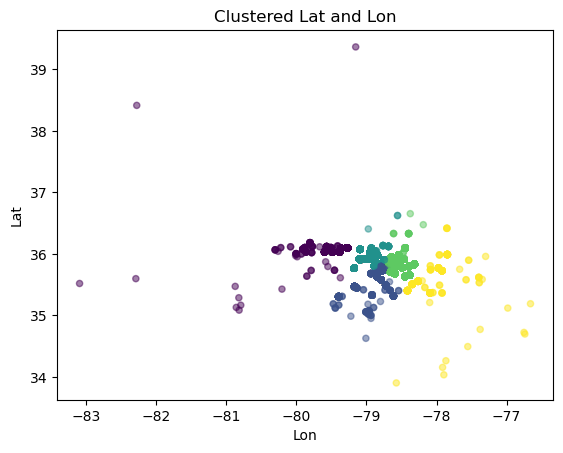

In [79]:
#Cluster the Lat and  Lon into groups
from sklearn.cluster import KMeans
th_df['Cluster'] = KMeans(n_clusters=5).fit_predict(th_df[['Lat', 'Lon']])
th_df.plot(kind="scatter", x="Lon", y="Lat", c="Cluster", cmap='viridis', colorbar=False, alpha=0.5)
plt.title('Clustered Lat and Lon')
plt.savefig('clustered.png')


In [80]:
#Create a variable for the top 10 cities with the highest average sold price
top10 = th_df.groupby('City')['Sold Price'].mean().nlargest(373).reset_index()

#Plot the top 10 cities with the highest average sold price
fig = px.bar(top10, x='City', y='Sold Price',color='City', template='plotly',
             title='Cities with Highest Avg. Sold Price') 
fig.update_traces(textposition='outside')
fig.show()

In [81]:
top10 = th_df.groupby('City')['Total Baths'].mean().nlargest(10).reset_index()

fig = px.bar(top10, x='City', y='Total Baths',color='Total Baths', template='plotly', 
             title='Top 10 Cities with the Most Avg Total Baths')
fig.update_traces(texttemplate='%{y:.}', textposition='outside')
fig.show()

In [82]:
df_mean = th_df.groupby('Over Asking')['SqFt'].mean().reset_index()

fig = px.scatter(df_mean, x='Over Asking', y='SqFt', trendline='ols', 
                 labels={'Over Asking':'Over Asking', 'SqFt':'Mean House Size'})
fig.update_layout(title='Distribution of Mean House Size by Over Asking')
fig.show()

In [83]:
fig = px.scatter(th_df, x='SqFt', y='Over Asking', color='Bedrooms', size='Total Baths',trendline='ols')
fig.update_layout(title='House Size vs Over Asking',
                  xaxis_title='House Size',
                  yaxis_title='Over Asking')
fig.show()

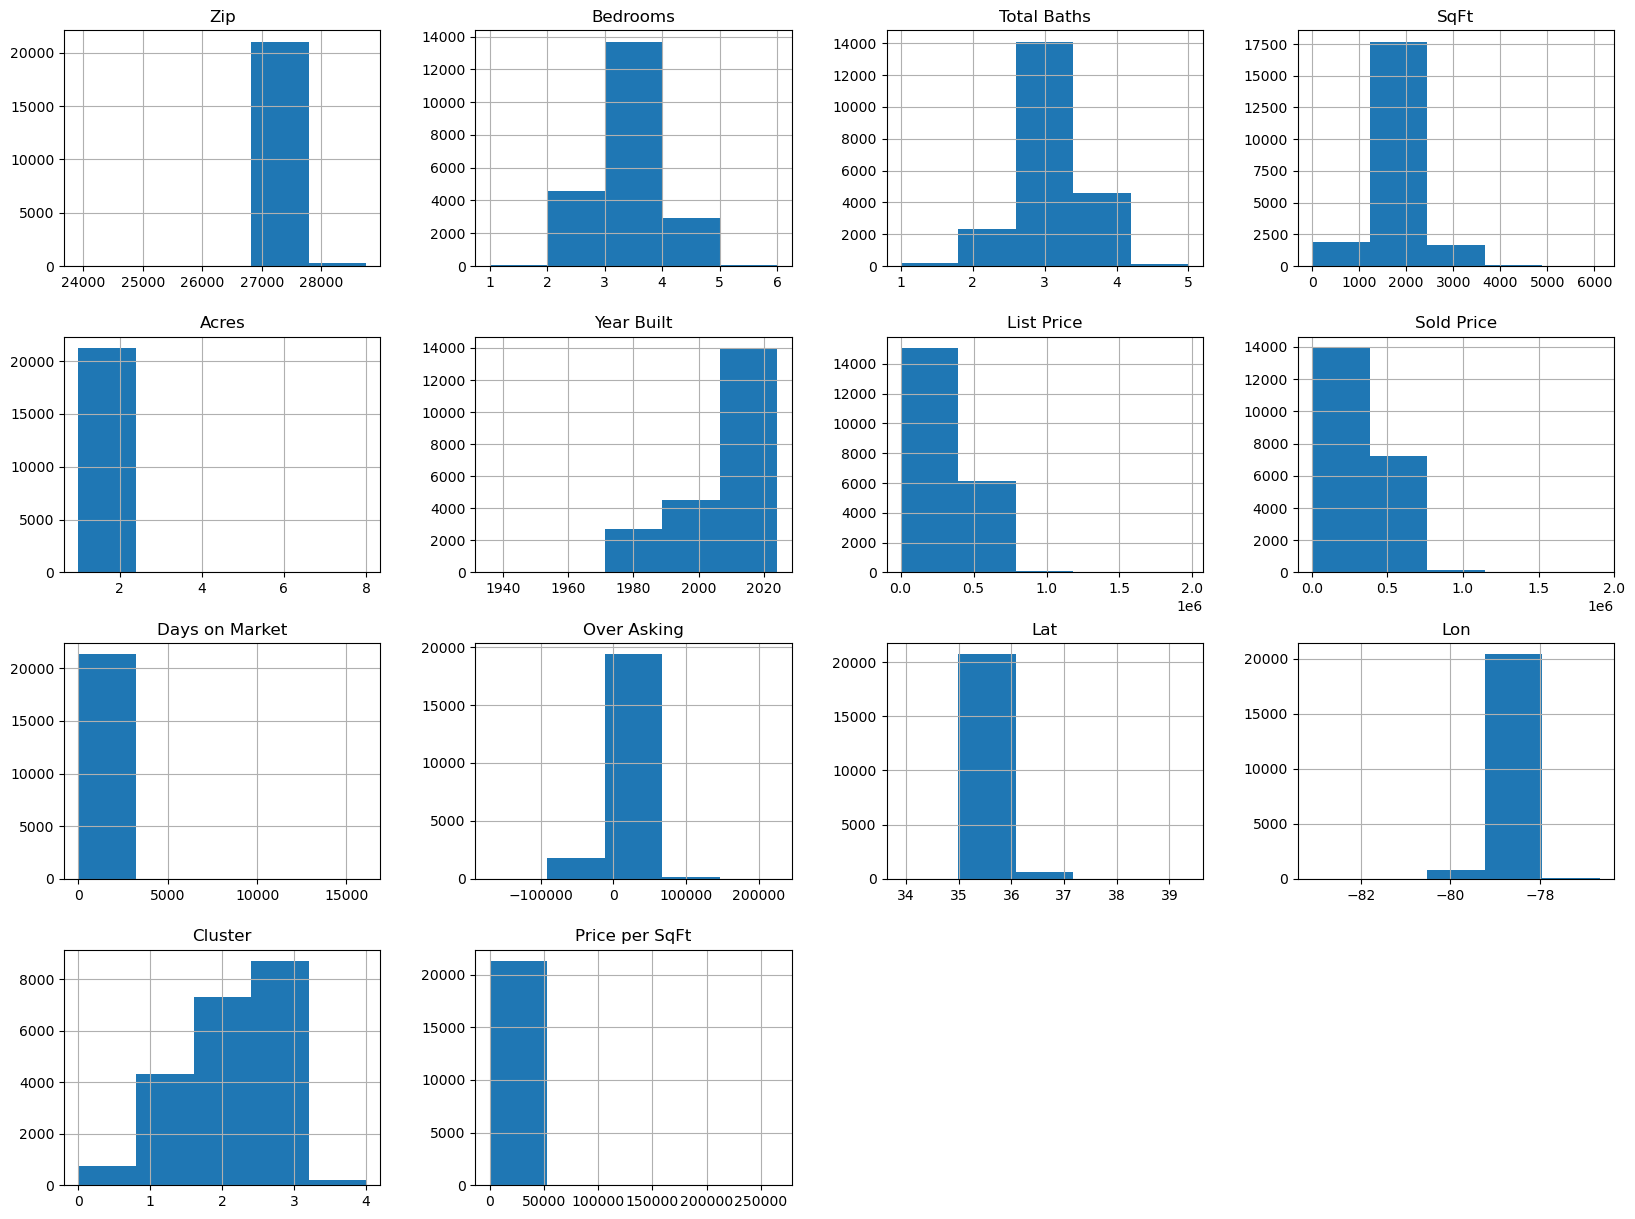

In [84]:
th_df.hist(bins=5, figsize=(20,15))
#plt.savefig("attribute_histogram_plots")
plt.show()

In [85]:
th_df.head()

,MLS #,City,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon,Cluster,Price per SqFt
0,2509707,Cary,27511,4,4,6115,1,1985,2023-05-08,2023-06-12,1049900,1275000,35,225100,35.7641,-78.7786,1,208.503679
1,2444544,Chapel Hill,27517,4,5,4049,1,2004,2022-04-25,2022-06-07,1090000,1300000,43,210000,35.9182,-79.0035,2,321.066930
2,2320632,Durham,27707,3,5,2763,1,2020,2020-05-22,2021-08-05,575000,729840,440,154840,35.9631,-78.9315,2,264.147666
3,2428221,Cary,27511,3,4,3477,1,2004,2022-01-24,2022-02-09,949900,1100000,16,150100,35.7641,-78.7786,1,316.364682
4,10018970,Chapel Hill,27517,4,5,4049,1,2004,2024-04-06,2024-04-17,1350000,1500000,11,150000,35.9182,-79.0035,2,370.461842


In [86]:
# Variable with the Longitude and Latitude
X=th_df.loc[:,['MLS #','Lat','Lon']]
X.head(10)

,MLS #,Lat,Lon
0,2509707,35.7641,-78.7786
1,2444544,35.9182,-79.0035
2,2320632,35.9631,-78.9315
3,2428221,35.7641,-78.7786
4,10018970,35.9182,-79.0035
5,2475238,35.9182,-79.0035
6,2492270,35.7908,-78.6530
7,2456097,35.8520,-78.6841
8,2353812,35.7641,-78.7786
9,2405051,36.0918,-78.9299


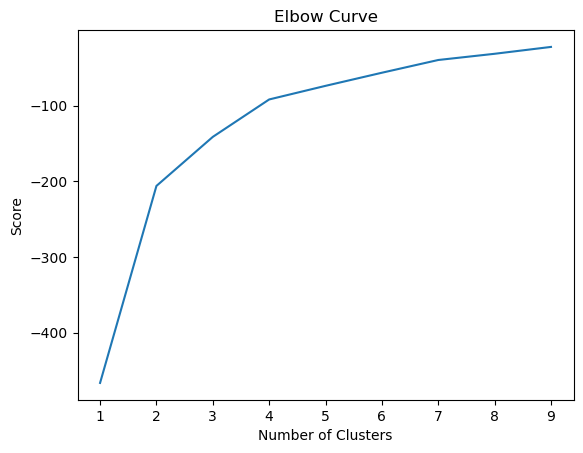

In [87]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = th_df[['Lat']]
X_axis = th_df[['Lon']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [88]:
kmeans = KMeans(n_clusters = 5, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

,MLS #,Lat,Lon,cluster_label
0,2509707,35.7641,-78.7786,3
1,2444544,35.9182,-79.0035,4
2,2320632,35.9631,-78.9315,4
3,2428221,35.7641,-78.7786,3
4,10018970,35.9182,-79.0035,4
5,2475238,35.9182,-79.0035,4
6,2492270,35.7908,-78.6530,1
7,2456097,35.8520,-78.6841,1
8,2353812,35.7641,-78.7786,3
9,2405051,36.0918,-78.9299,4


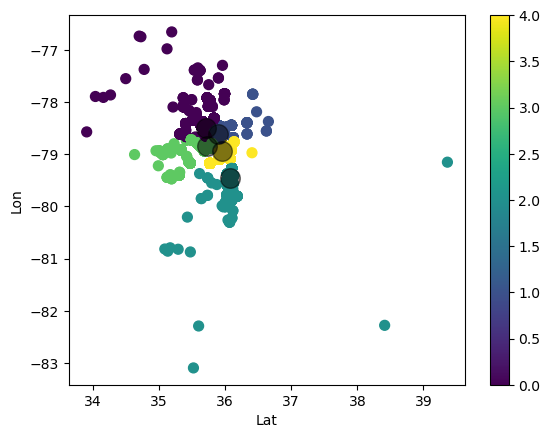

In [89]:
X.plot.scatter(x = 'Lat', y = 'Lon', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

<Axes: xlabel='SqFt'>

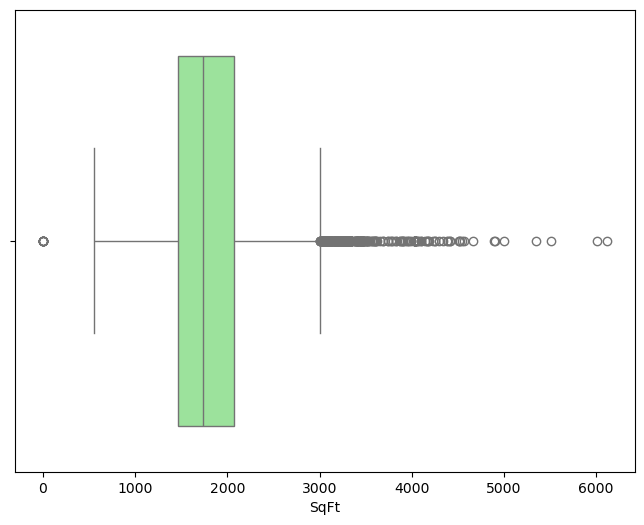

In [90]:
#Visualize the distribution of each numerical feature using box plots. Points beyond the “whiskers” of the box plot can be considered potential outliers.  
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=th_df['SqFt'], color='lightgreen')

<Axes: xlabel='Bedrooms'>

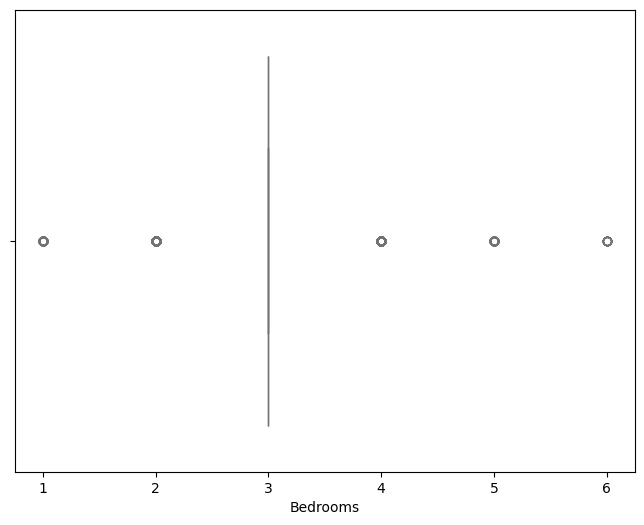

In [91]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=th_df['Bedrooms'], color='lightgreen')

<Axes: xlabel='Total Baths'>

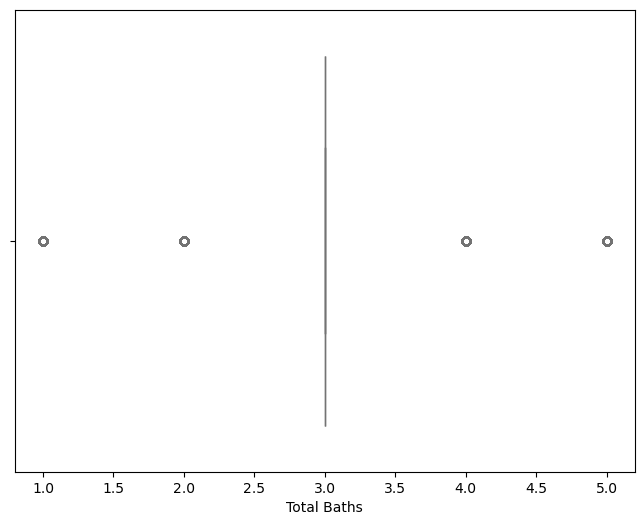

In [92]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=th_df['Total Baths'], color='lightgreen')

<Axes: xlabel='Acres'>

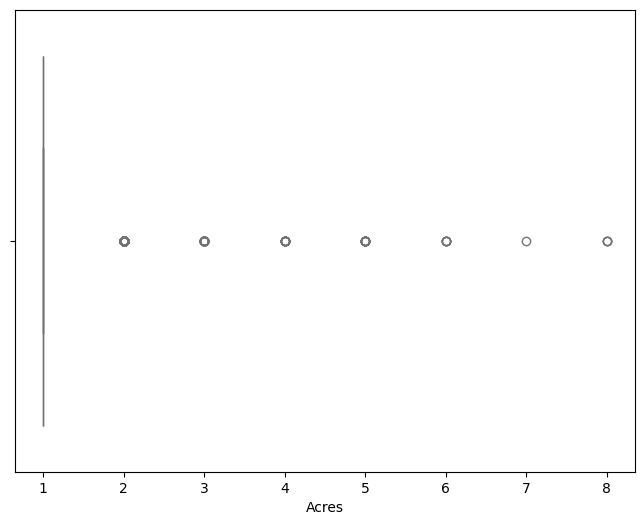

In [93]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=th_df['Acres'], color='lightgreen')

<Axes: xlabel='Days on Market'>

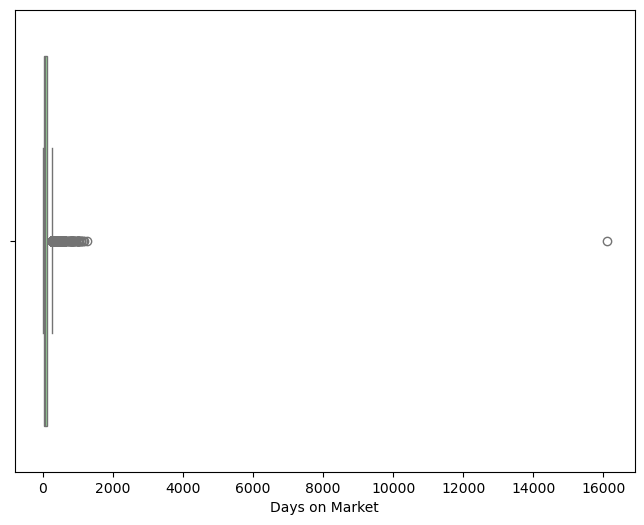

In [94]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=th_df['Days on Market'], color='lightgreen')

<Axes: xlabel='Year Built'>

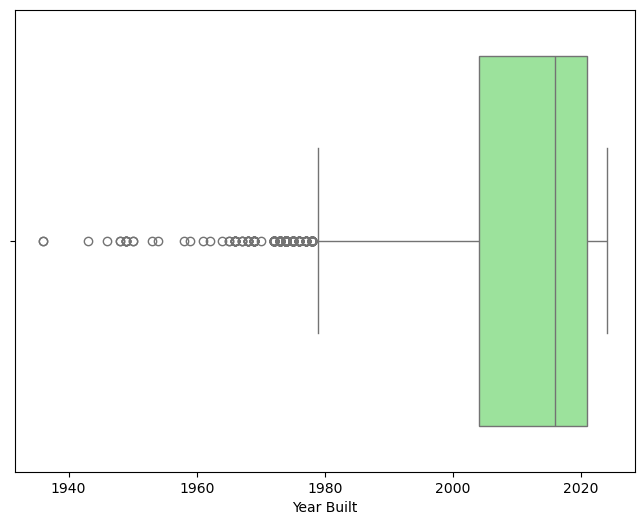

In [95]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=th_df['Year Built'], color='lightgreen')

In [96]:
#Calculate the Z-score for each data point, and points with a Z-score beyond a certain threshold can be considered outliers.
from scipy.stats import zscore

z_scores = zscore(th_nostr_df)
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)

outliers

0        False
1        False
2        False
3        False
4        False
         ...  
21314    False
21315    False
21316    False
21317    False
21318    False
Length: 21319, dtype: bool

In [97]:
Q1 = th_nostr_df.quantile(0.25)
Q3 = th_nostr_df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((th_nostr_df < (Q1 - 1.5 * IQR)) | (th_nostr_df > (Q3 + 1.5 * IQR))).any(axis=1)

outliers

0        True
1        True
2        True
3        True
4        True
         ... 
21314    True
21315    True
21316    True
21317    True
21318    True
Length: 21319, dtype: bool

<Axes: xlabel='Sold Price', ylabel='Count'>

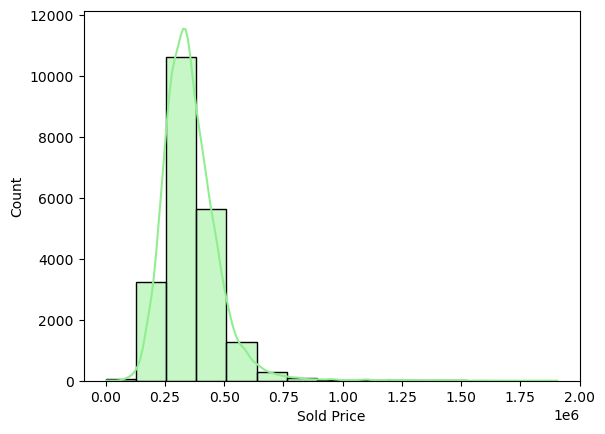

In [98]:
sns.histplot(th_df['Sold Price'], bins=15, kde=True, color='lightgreen')


([<matplotlib.patches.Wedge at 0x144879b10>,
 [Text(-0.9913519333593445, -0.4766774005810325, '3'),
  Text(1.0999934041286852, -0.003809314031085122, '2'),
  Text(0.5021533965141723, 0.9786940105923202, '4'),
  Text(0.03678920748747683, 1.0993846252392487, '1'),
  Text(0.013939979573879872, 1.0999116678031378, '5'),
  Text(0.0017830556711967039, 1.0999985548683568, '6')],
 [Text(-0.540737418196006, -0.2600058548623813, '64.3%'),
  Text(0.59999640225201, -0.002077807653319157, '21.4%'),
  Text(0.273901852644094, 0.5338330966867201, '13.7%'),
  Text(0.020066840447714628, 0.5996643410395902, '0.4%'),
  Text(0.007603625222116293, 0.5999518188017114, '0.3%'),
  Text(0.0009725758206527474, 0.5999992117463764, '0.1%')])

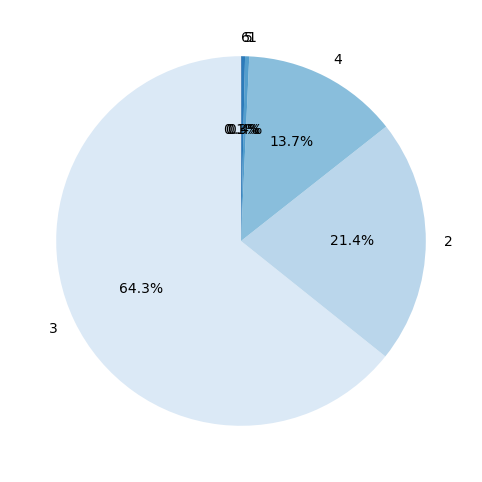

In [99]:
bedroom_counts = th_df['Bedrooms'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(bedroom_counts, labels=bedroom_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Blues'))


([<matplotlib.patches.Wedge at 0x144a8f9d0>,
 [Text(-0.9607606725831779, -0.5356668087697052, '3'),
  Text(1.0919300859066996, 0.13299882515190922, '4'),
  Text(0.4578209286005703, 1.0001999786719211, '2'),
  Text(0.06658126985328955, 1.097983121229431, '1'),
  Text(0.02058516291690345, 1.0998073699824369, '5')],
 [Text(-0.5240512759544605, -0.2921818956925664, '66.2%'),
  Text(0.5955982286763815, 0.07254481371922321, '21.5%'),
  Text(0.24972050650940195, 0.5455636247301388, '11.0%'),
  Text(0.03631705628361248, 0.5988998843069624, '0.7%'),
  Text(0.011228270681947334, 0.5998949290813291, '0.6%')])

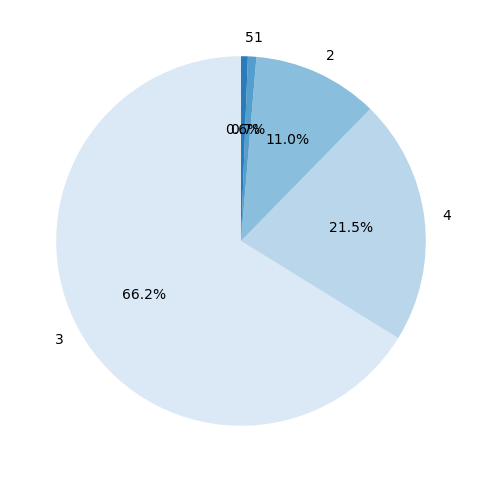

In [100]:
bathroom_counts = th_df['Total Baths'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(bathroom_counts, labels=bathroom_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Blues'))


In [101]:
# Compute correlation matrix
corr_matrix = th_nostr_df.corr()

<Axes: >

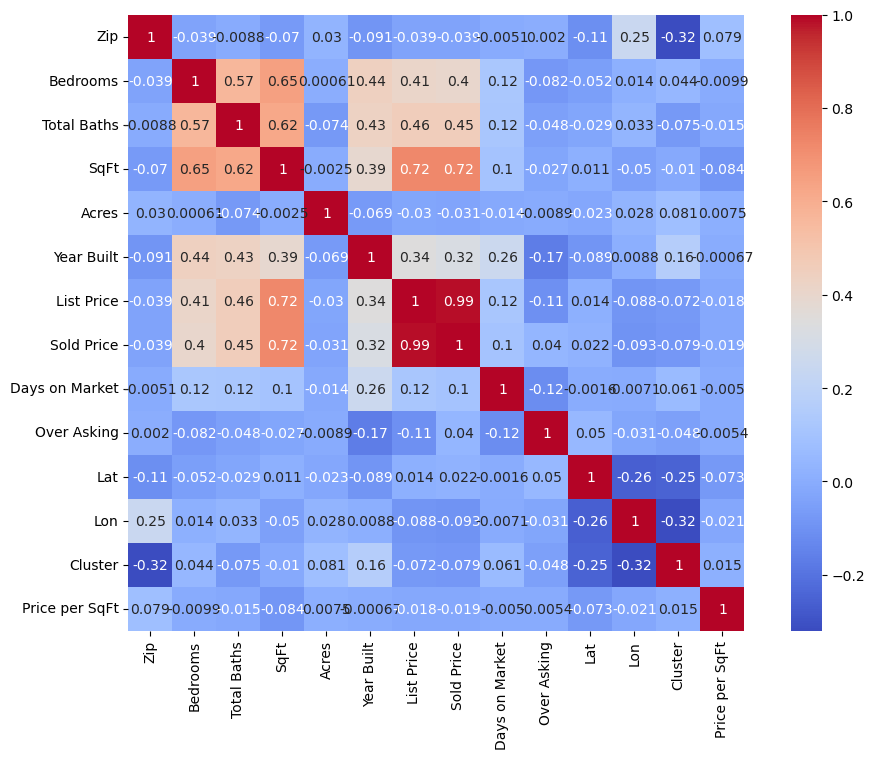

In [102]:
# Generate heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)